<a href="https://www.kaggle.com/code/sharanharsoor/pytorch-basics-and-nn-from-scratch?scriptVersionId=127110875" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction.
In this notebook, we will understand the basics of PyTorch and build different simple neural networks from scratch using PyTorch. <br>
1. Basics of PyTorch. <br>
    * PyTorch
    * What are tensors
    * Initialising, slicing, reshaping tensors
    * Numpy and PyTorch interfacing
    * GPU support for PyTorch + Enabling GPUs on Google Colab
    * Speed comparisons, Numpy -- PyTorch -- PyTorch on GPU
    * Autodiff concepts and application
    * Writing a basic learning loop using autograd
2. Building NN using PyTorch. <br>
    * Feedforward network with Pytorch tensors and autograd
    * Using Pytorch's NN -> Functional, Linear, Sequential & Pytorch's Optim
    * Moving things to CUDA

Most of the concepts explained in this Notebook are learnt from course [Deep Learning](https://padhai.onefourthlabs.in/courses/dl-feb-2019)

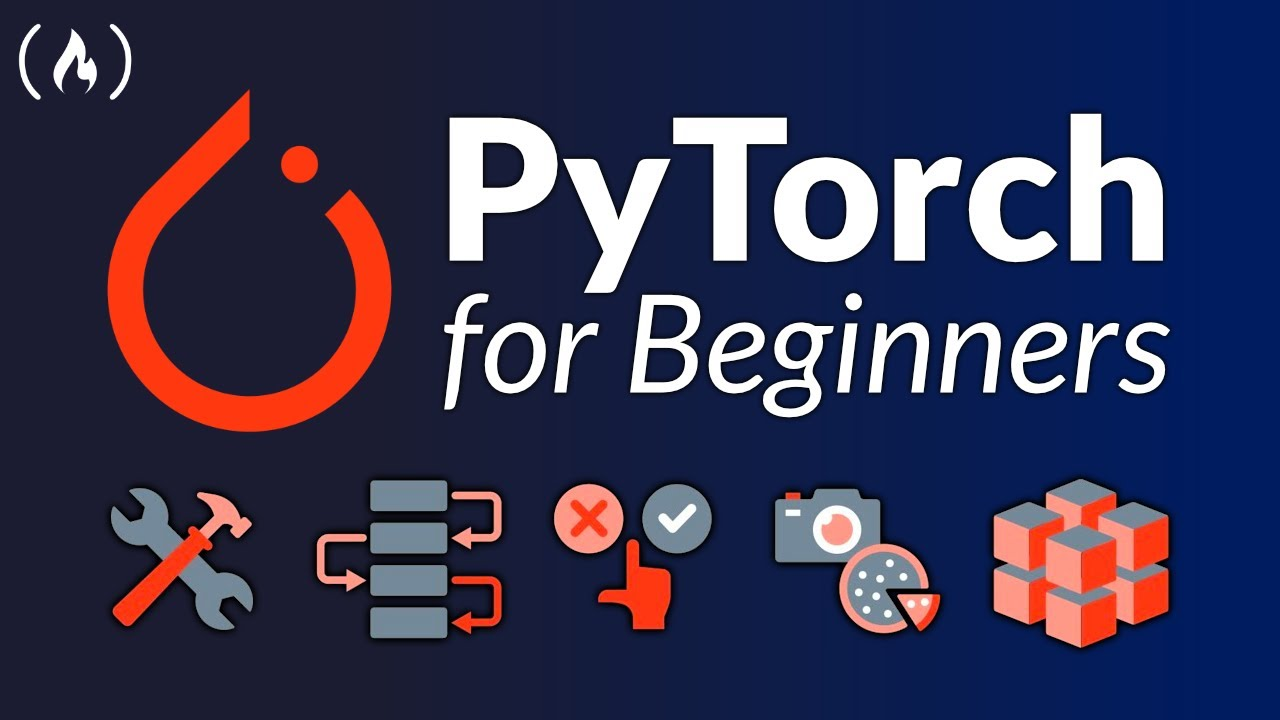 <br>
<br>
[Image](https://www.youtube.com/watch?v=V_xro1bcAuA)

# Basics of PyTorch.

In [1]:
# importing PyTorch library
import torch

import numpy as np
import matplotlib.pyplot as plt

## Initialise tensors

In [2]:
# the PyTorch works on something called tensors 
# Tensor : a tensor is a fundamental data structure used for representing multi-dimensional arrays of numerical data. 
# A tensor is similar to a NumPy array but with the added advantage of GPU acceleration for faster computations.
# Tensors can be of different dimensions or shapes, ranging from one-dimensional tensors (vectors) to two-dimensional tensors (matrices) 
# and higher dimensional tensors. They can also be of different data types, including float, integer, and boolean.

# a tensor can be intialised using ones, zeros, rand etc..

x = torch.ones(3, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [3]:
x = torch.zeros(3, 2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [4]:
x = torch.rand(3, 2)
print(x)

tensor([[0.4758, 0.9398],
        [0.9715, 0.2103],
        [0.4492, 0.4444]])


In [5]:
x = torch.empty(3, 2)
print(x)
y = torch.zeros_like(x)
print(y)

tensor([[ 8.4194e-16,  4.5836e-41],
        [-3.5154e+24,  3.2369e-41],
        [ 4.4842e-44,  0.0000e+00]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [6]:
x = torch.linspace(0, 1, steps=5)
print(x)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [7]:
x = torch.tensor([[1, 2], 
                 [3, 4], 
                 [5, 6]])
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


## Slicing tensors

In [8]:
print("Print the shape of the tensor  : ",x.size())
print("Print all values of 1st column : ",x[:, 1]) 
print("Print all values of 0th row    : ",x[0, :]) 

Print the shape of the tensor  :  torch.Size([3, 2])
Print all values of 1st column :  tensor([2, 4, 6])
Print all values of 0th row    :  tensor([1, 2])


In [9]:
# assign 1st row and 1st column value to y
y = x[1, 1]
print(y)
print(y.item())

tensor(4)
4


## Reshaping tensors

In [10]:
# view is used to reshape in PyTorch (similar to numpy reshape)
print(x)
y = x.view(2, 3)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [11]:
y = x.view(6,-1) 
print(y)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


## Simple Tensor Operations

In [12]:
x = torch.ones([3, 2])
y = torch.ones([3, 2])
z = x + y
print(z)
z = x - y
print(z)
z = x * y
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [13]:
z = y.add(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [14]:
# add_ is addition inplace. In this case added value is updated in both y and z.
z = y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


## Numpy <> PyTorch

In [15]:
# converting PyTorch tensor to Numpy array.
x_np = x.numpy()
print(type(x), type(x_np))
print(x_np)

<class 'torch.Tensor'> <class 'numpy.ndarray'>
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [16]:
# converting from numpy to PyTorch tensor.
a = np.random.randn(5)
print(a)
a_pt = torch.from_numpy(a)
print(type(a), type(a_pt))
print(a_pt)

[-0.59395495 -0.65958242  0.04480992 -0.26219598  0.05773287]
<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([-0.5940, -0.6596,  0.0448, -0.2622,  0.0577], dtype=torch.float64)


In [17]:
# updating numpy array (a) is also updating the PyTorch tensor (a_pt). this is an added advantage if from tensor or numpy same 
# variable need to access. 
np.add(a, 1, out=a)
print(a)
print(a_pt) 

[0.40604505 0.34041758 1.04480992 0.73780402 1.05773287]
tensor([0.4060, 0.3404, 1.0448, 0.7378, 1.0577], dtype=torch.float64)


## Execution time comparision Numpy <> PyTorch

In [18]:
%%time
for i in range(100):
  a = np.random.randn(100,100)
  b = np.random.randn(100,100)
  c = np.matmul(a, b)

CPU times: user 74.4 ms, sys: 0 ns, total: 74.4 ms
Wall time: 75.2 ms


In [19]:
%%time
for i in range(100):
  a = torch.randn([100, 100])
  b = torch.randn([100, 100])
  c = torch.matmul(a, b)

CPU times: user 21.4 ms, sys: 2.05 ms, total: 23.4 ms
Wall time: 57.7 ms


The time requiered to create PyTorch tensor is much lesser than Numpy.
Note bot the execution is done on CPU, GPU is not enabled yet.

In [20]:
%%time
for i in range(10):
  a = np.random.randn(100,100)
  b = np.random.randn(100,100)
  c = a + b

CPU times: user 6.24 ms, sys: 899 µs, total: 7.14 ms
Wall time: 6.62 ms


In [21]:
%%time
for i in range(10):
  a = torch.randn([100, 100])
  b = torch.randn([100, 100])
  c = a + b

CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 1.48 ms


Same observation as before. PyTorch tensor take less time than Numpy.


## CUDA support

In [22]:
# number of GPU cards
print(torch.cuda.device_count())

1


In [23]:
# GPU device name 
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [24]:
# selecting the GPU device.
cuda0 = torch.device('cuda:0')

In [25]:
# to run it on GPU, need to select device.
a = torch.ones(3, 2, device=cuda0)
b = torch.ones(3, 2, device=cuda0)
c = a + b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [26]:
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [27]:
%%time
for i in range(10):
  a = np.random.randn(10000,10000)
  b = np.random.randn(10000,10000)
  np.add(b, a)

CPU times: user 52 s, sys: 4.17 s, total: 56.2 s
Wall time: 56.4 s


In [28]:
%%time
for i in range(10):
  a_cpu = torch.randn([10000, 10000])
  b_cpu = torch.randn([10000, 10000])
  b_cpu.add_(a_cpu)

CPU times: user 13.7 s, sys: 3.91 s, total: 17.6 s
Wall time: 17.6 s


In [29]:
%%time
for i in range(10):
  a = torch.randn([10000, 10000], device=cuda0)
  b = torch.randn([10000, 10000], device=cuda0)
  b.add_(a)

CPU times: user 1.71 ms, sys: 5.83 ms, total: 7.54 ms
Wall time: 9.47 ms


PyTorch execution was already fast in CPU but with GPU it's much faster. This almost 100 times less time on GPU as compare with CPU.
execution time : PyTorch GPU < PyTorch CPU < Numpy

In [30]:
%%time
for i in range(10):
  a = np.random.randn(10000,10000)
  b = np.random.randn(10000,10000)
  np.matmul(b, a)

CPU times: user 11min 36s, sys: 10.4 s, total: 11min 46s
Wall time: 6min 35s


In [31]:
%%time
for i in range(10):
  a_cpu = torch.randn([10000, 10000])
  b_cpu = torch.randn([10000, 10000])
  torch.matmul(a_cpu, b_cpu)

CPU times: user 2min 42s, sys: 6.56 s, total: 2min 48s
Wall time: 2min 49s


In [32]:
%%time
for i in range(10):
  a = torch.randn([10000, 10000], device=cuda0)
  b = torch.randn([10000, 10000], device=cuda0)
  torch.matmul(a, b)

CPU times: user 295 ms, sys: 176 ms, total: 471 ms
Wall time: 1.61 s


Same observation as before. The difference between CPU and GPU is so huge, this shows the significance of GPU.

## Autodiff (Automatic differentiation).


In [33]:
# requires_grad is a way to indicate that x could be differentiable later.
x = torch.ones([3, 2], requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [34]:
y = x + 5
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [35]:
z = y*y + 1
print(z)

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [36]:
t = torch.sum(z)
print(t)

tensor(222., grad_fn=<SumBackward0>)


In [37]:
# derivative t w.r.t x
print(x.grad)

None


$t = \sum_i z_i, z_i = y_i^2 + 1, y_i = x_i + 5$

$\frac{\partial t}{\partial x_i} = \frac{\partial z_i}{\partial x_i} = \frac{\partial z_i}{\partial y_i} \frac{\partial y_i}{\partial x_i} = 2y_i \times 1$


At x = 1, y = 6, $\frac{\partial t}{\partial x_i} = 12$

In [38]:
# Autodiff with sigmoid function.

x = torch.ones([3, 2], requires_grad=True)
y = x + 5
r = 1/(1 + torch.exp(-y)) # sigmoid function. 
print(r)
s = torch.sum(r)
s.backward()
print(x.grad)

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [39]:
x = torch.ones([3, 2], requires_grad=True)
y = x + 5
r = 1/(1 + torch.exp(-y))
a = torch.ones([3, 2]) # instead of sum using value of r itself (ones[3,2])
# in this case pointwise multiplication is done with a. this apporach helps in
# cascading the chain rule, having multiple values. 
# diff equ here
r.backward(a)
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


$\frac{\partial{s}}{\partial{x}} = \frac{\partial{s}}{\partial{r}} \cdot \frac{\partial{r}}{\partial{x}}$

For the above code $a$ represents $\frac{\partial{s}}{\partial{r}}$ and then $x.grad$ gives directly $\frac{\partial{s}}{\partial{x}}$



## Autodiff example that looks like what we have been doing

In Neural network, the gradient is used to find a loss to improve the overall accuracy of the model using backpropegation. <br>
In this, will take an regression based example.  <br>
assumption y is a ground truth and y_hat is model prediction <br>
using the GD approach fidning the loss and weights. <br>
This exersise is done with one update


In [40]:
x = torch.randn([20, 1], requires_grad=True)
y = 3*x - 2 # assume it as a ground truth value.

In [41]:
w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

y_hat = w*x + b

loss = torch.sum((y_hat - y)**2)

In [42]:
print(loss)


tensor(194.6621, grad_fn=<SumBackward0>)


In [43]:
loss.backward()

In [44]:
print(w.grad, b.grad)

tensor([-37.4240]) tensor([104.8254])


## Do it in a loop
Finding the loss and re-trining the model using backpropegation is done untill the loss is minimised to some extend or local minima is achieved. <br>
Hence using the loop to find the minimal loss and weights associated. <br>


In [45]:
learning_rate = 0.01

w = torch.tensor([1.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

print(w.item(), b.item())

for i in range(10):
  
  x = torch.randn([20, 1])
  y = 3*x - 2 # the correct value of w and b are 2 and -2.
  
  y_hat = w*x + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

  print("weights :", w.item(), b.item())
  print("loss    :", loss)
  

1.0 1.0
weights : 1.9393665790557861 -0.1920391321182251
loss    : tensor(272.7425, grad_fn=<SumBackward0>)
weights : 2.04166841506958 -0.7211614847183228
loss    : tensor(53.2569, grad_fn=<SumBackward0>)
weights : 2.3824498653411865 -1.1534366607666016
loss    : tensor(43.9696, grad_fn=<SumBackward0>)
weights : 2.6958656311035156 -1.5205389261245728
loss    : tensor(25.2163, grad_fn=<SumBackward0>)
weights : 2.8549907207489014 -1.705886721611023
loss    : tensor(6.8631, grad_fn=<SumBackward0>)
weights : 2.8960771560668945 -1.8060204982757568
loss    : tensor(1.7704, grad_fn=<SumBackward0>)
weights : 2.9336531162261963 -1.8802220821380615
loss    : tensor(0.9149, grad_fn=<SumBackward0>)
weights : 2.973728656768799 -1.9328011274337769
loss    : tensor(0.4478, grad_fn=<SumBackward0>)
weights : 2.9780125617980957 -1.956796646118164
loss    : tensor(0.0863, grad_fn=<SumBackward0>)
weights : 2.986478805541992 -1.9731477499008179
loss    : tensor(0.0446, grad_fn=<SumBackward0>)


## Do it for a large problem

In [46]:
%%time
learning_rate = 0.001
N = 10000000
epochs = 200

w = torch.rand([N], requires_grad=True)
b = torch.ones([1], requires_grad=True)

# print(torch.mean(w).item(), b.item())

for i in range(epochs):
  
  x = torch.randn([N])
  y = torch.dot(3*torch.ones([N]), x) - 2
  
  y_hat = torch.dot(w, x) + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

#   print(torch.mean(w).item(), b.item())
  

CPU times: user 25.9 s, sys: 19.3 s, total: 45.2 s
Wall time: 45.3 s


In [47]:
%%time
learning_rate = 0.001
N = 10000000
epochs = 200

w = torch.rand([N], requires_grad=True, device=cuda0)
b = torch.ones([1], requires_grad=True, device=cuda0)

# print(torch.mean(w).item(), b.item())

for i in range(epochs):
  
  x = torch.randn([N], device=cuda0)
  y = torch.dot(3*torch.ones([N], device=cuda0), x) - 2
  
  y_hat = torch.dot(w, x) + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

  #print(torch.mean(w).item(), b.item())
  

CPU times: user 178 ms, sys: 77.1 ms, total: 255 ms
Wall time: 267 ms


# Building NN using PyTorch.<br>
## The NN code is built based on below network. <br>
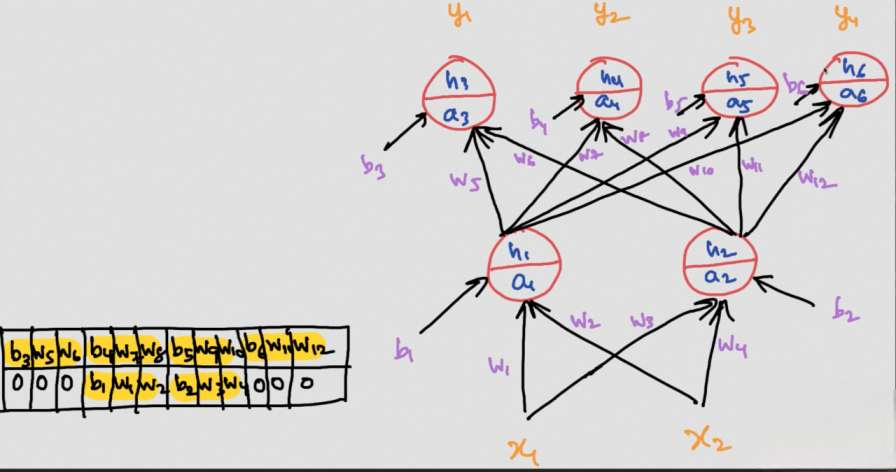


In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [49]:
torch.manual_seed(0)

In [50]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate Dataset

In [51]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


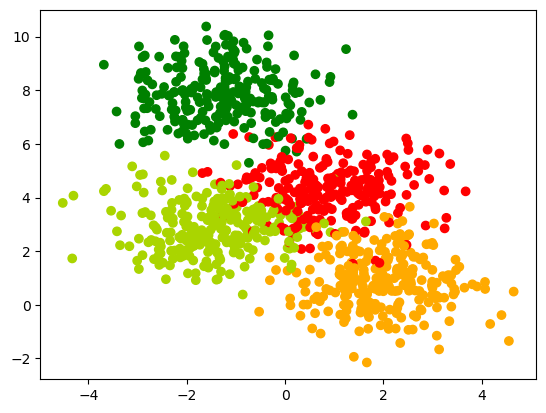

In [52]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [53]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [54]:
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [55]:
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N, 2) x (2, 2) -> (N, 2)
  h1 = a1.sigmoid() # (N, 2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N, 2) x (2, 4) -> (N, 4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # (N, 4) # softmax 
  return h2

In [56]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])

(-y_hat[range(y_hat.shape[0]), y].log()).mean().item()

(torch.argmax(y_hat, dim=1) == y).float().mean().item()

0.5

In [57]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [58]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

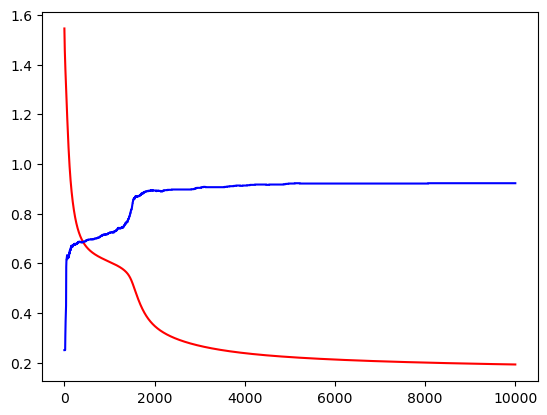

Loss before training 1.5456440448760986
Loss after training 0.19288595020771027


In [59]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.Functional

In [60]:
import torch.nn.functional as F

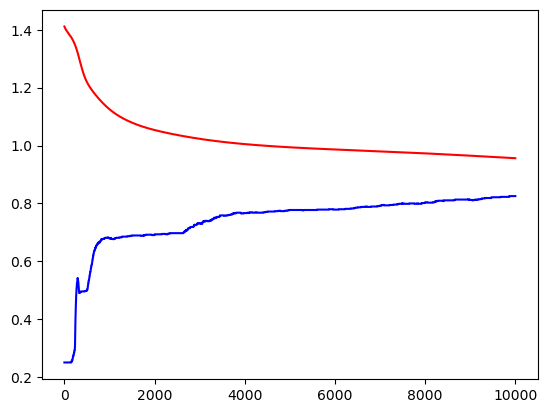

Loss before training 1.4111982583999634
Loss after training 0.9561847448348999


In [61]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.Parameter

In [62]:
import torch.nn as nn

In [63]:
class FirstNetwork(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
    
  def forward(self, X):
    a1 = torch.matmul(X, self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [64]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

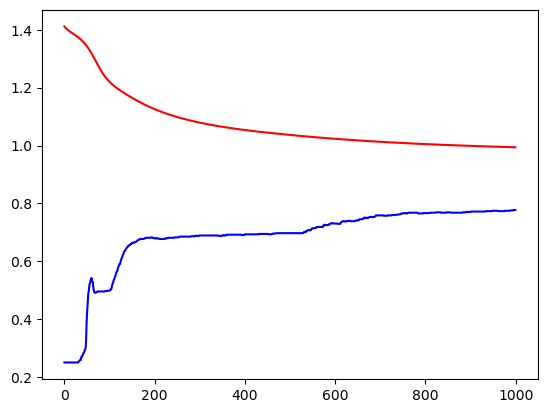

Loss before training 1.4111982583999634
Loss after training 0.9939236044883728


In [65]:
fn = FirstNetwork()
fit()

## Using NN.Linear 

In [66]:
class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2) # internally have weights and bias created. (in this case weights of 2,2 and bias of 2)
    self.lin2 = nn.Linear(2, 4)
    
  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

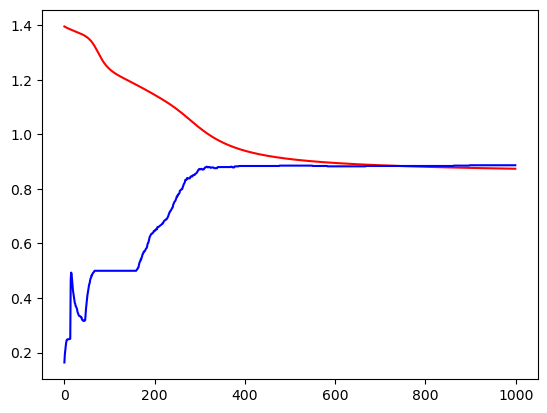

Loss before training 1.3951597213745117
Loss after training 0.8738412857055664


In [67]:
fn = FirstNetwork_v1()
fit()

## Using  Optim

In [68]:
from torch import optim

In [69]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

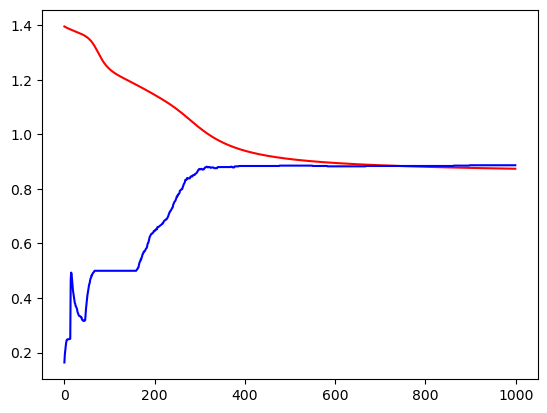

Loss before training 1.3951597213745117
Loss after training 0.8738412857055664


In [70]:
fn = FirstNetwork_v1()
fit_v1()

## Using NN.Sequential

In [71]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

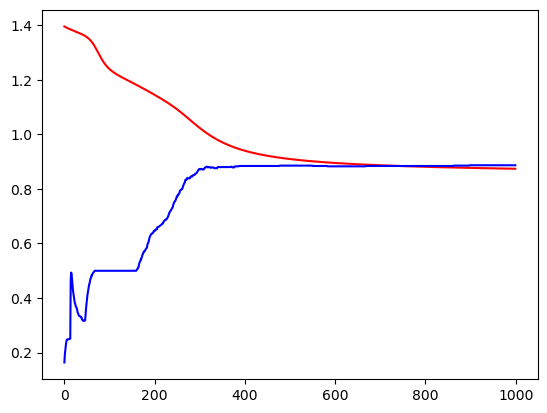

Loss before training 1.3951597213745117
Loss after training 0.873841404914856


In [72]:
fn = FirstNetwork_v2()
fit_v1()

In [73]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()

In [74]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.873841404914856

## Running it on GPUs

In [75]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 0.7479431629180908


In [76]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4), 
        nn.Sigmoid(), 
        nn.Linear(1024*4, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [77]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890228271484375
Time taken 22.493787050247192


# References 

1. Above mentioned concepts are learnt from https://padhai.onefourthlabs.in/courses/dl-feb-2019

## Happy Learning ##